# Домашнее задание 2 (Введение в вычислительную геномику)



Ваши Фамилия, Имя

Для проверяющего:

*Оценка*: (сумма баллов)$*\frac{50}{21}$ из 50

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Задача 1 
##### (4 пункта, макс. баллы: 1, 2, 4, 3)

Рассмотрим две непересекающиеся популяции A и B и коалесцентное дерево, начинающееся с двух веток, находящихся в популяции A. Каждая из веток может мигрировать независимо от другой с интенсивностью $m_{A\rightarrow B}=m_{B\rightarrow A} = m$. Если две ветки вместе в одной популяции, то событие коалесценции происходит с интенсивностью $\frac{C_2^{1}}{N} = \frac{1}{N}$, иначе интенсивность равна нулю. 

Возможная реализация коалесцентного дерева при таком условии может выглядеть так:

<img src="../data/raw/tree.jpg" width="450"/>

1. Промоделируйте данный процесс с помощью марковского процесса в непрерывном времени, перечислите состояния, укажите матрицу генератора $Q$.
2. Найдите матрицу перехода за время $t$, положив $N=1$, $m=2$. 
3. Вычислите $\mathbb{P}\{T_1 \le t\}$, где $T_1$ - время коалесценции, в общем виде через $N$ и $m$.
4. Вычислите $\lim_{m\rightarrow\infty}\mathbb{P}\{T_1 \le t\}.$ Объясните результат качественно в терминах взаимодействия популяций.


Если нужно, в пунктах 3-4 можно воспользоваться библиотеками для символьных вычислений. 


Приведите решение с максимально подробным обоснованием.

> ### Решение (Задача 1): пункт 1
>
> Состояния до коалесценции задаются положениями двух линий предков по демам.
>
> Транзитные состояния (без учёта порядка линий):
>
> - $AA$: обе линии в $A$,
> - $AB$: одна линия в $A$, другая в $B$,
> - $BB$: обе линии в $B$.
>
> Добавим поглощающее состояние $C$ = «коалесценция произошла».
>
> Интенсивности миграций: каждая линия мигрирует независимо с интенсивностью $m$ (и $A\to B$, и $B\to A$).
>
> - $AA\to AB$ с интенсивностью $2m$,
> - $BB\to AB$ с интенсивностью $2m$,
> - $AB\to AA$ с интенсивностью $m$,
> - $AB\to BB$ с интенсивностью $m$.
>
> Коалесценция возможна только когда линии в одном деме:
>
> - $AA\to C$ с интенсивностью $1/N$,
> - $BB\to C$ с интенсивностью $1/N$,
> - из $AB$ коалесценции нет.
>
> Тогда при порядке состояний $(AA,AB,BB,C)$ матрица генератора равна
>
> $$
> Q=
> \begin{pmatrix}
> -(2m+\tfrac1N) & 2m & 0 & \tfrac1N\\
> m & -2m & m & 0\\
> 0 & 2m & -(2m+\tfrac1N) & \tfrac1N\\
> 0 & 0 & 0 & 0
> \end{pmatrix}.
> $$
>
> Начальное состояние по условию: $X(0)=AA$.
>

> ### Решение (Задача 1): пункт 2
>
> При $N=1$ и $m=2$ имеем $2m=4$ и $1/N=1$, поэтому
>
> $$
> Q=
> \begin{pmatrix}
> -5 & 4 & 0 & 1\\
> 2 & -4 & 2 & 0\\
> 0 & 4 & -5 & 1\\
> 0 & 0 & 0 & 0
> \end{pmatrix}.
> $$
>
> Матрица переходов за время $t$ определяется как
>
> $$P(t)=e^{Qt}.$$
>
> Обозначим
>
> $$D=\sqrt{65},\qquad \lambda_{\pm}=-\frac{9}{2}\pm\frac{D}{2}.$$
>
>
> $$
> p_{12}(t)=\frac{4}{D}\left(e^{\lambda_{+}t}-e^{\lambda_{-}t}\right),\qquad
> p_{21}(t)=\frac{2}{D}\left(e^{\lambda_{+}t}-e^{\lambda_{-}t}\right),
> $$
>
> $$
> p_{11}(t)=\frac12\left(\frac{D-1}{2D}e^{\lambda_{+}t}+\frac{D+1}{2D}e^{\lambda_{-}t}+e^{-5t}\right),\qquad
> p_{13}(t)=\frac12\left(\frac{D-1}{2D}e^{\lambda_{+}t}+\frac{D+1}{2D}e^{\lambda_{-}t}-e^{-5t}\right),
> $$
>
> $$
> p_{22}(t)=\frac{D+1}{2D}e^{\lambda_{+}t}+\frac{D-1}{2D}e^{\lambda_{-}t}.
> $$
>
>
> $$
> P(t)=
> \begin{pmatrix}
> p_{11}(t) & p_{12}(t) & p_{13}(t) & 1-p_{11}(t)-p_{12}(t)-p_{13}(t)\\
> p_{21}(t) & p_{22}(t) & p_{21}(t) & 1-2p_{21}(t)-p_{22}(t)\\
> p_{13}(t) & p_{12}(t) & p_{11}(t) & 1-p_{11}(t)-p_{12}(t)-p_{13}(t)\\
> 0 & 0 & 0 & 1
> \end{pmatrix}.
> $$
>
> Ниже — та же матрица $P(t)$ в развёрнутом виде (без обозначений $p_{ij}(t)$):
>
> $$
> P(t)=
> \begin{pmatrix}
> \frac12\left(\frac{D-1}{2D}e^{\lambda_{+}t}+\frac{D+1}{2D}e^{\lambda_{-}t}+e^{-5t}\right)
> & \frac{4}{D}\left(e^{\lambda_{+}t}-e^{\lambda_{-}t}\right)
> & \frac12\left(\frac{D-1}{2D}e^{\lambda_{+}t}+\frac{D+1}{2D}e^{\lambda_{-}t}-e^{-5t}\right)
> & 1-\frac{D-1}{2D}e^{\lambda_{+}t}-\frac{D+1}{2D}e^{\lambda_{-}t}-\frac{4}{D}\left(e^{\lambda_{+}t}-e^{\lambda_{-}t}\right)\\
> 
> \frac{2}{D}\left(e^{\lambda_{+}t}-e^{\lambda_{-}t}\right)
> & \frac{D+1}{2D}e^{\lambda_{+}t}+\frac{D-1}{2D}e^{\lambda_{-}t}
> & \frac{2}{D}\left(e^{\lambda_{+}t}-e^{\lambda_{-}t}\right)
> & 1-\frac{D+1}{2D}e^{\lambda_{+}t}-\frac{D-1}{2D}e^{\lambda_{-}t}-\frac{4}{D}\left(e^{\lambda_{+}t}-e^{\lambda_{-}t}\right)\\
> 
> \frac12\left(\frac{D-1}{2D}e^{\lambda_{+}t}+\frac{D+1}{2D}e^{\lambda_{-}t}-e^{-5t}\right)
> & \frac{4}{D}\left(e^{\lambda_{+}t}-e^{\lambda_{-}t}\right)
> & \frac12\left(\frac{D-1}{2D}e^{\lambda_{+}t}+\frac{D+1}{2D}e^{\lambda_{-}t}+e^{-5t}\right)
> & 1-\frac{D-1}{2D}e^{\lambda_{+}t}-\frac{D+1}{2D}e^{\lambda_{-}t}-\frac{4}{D}\left(e^{\lambda_{+}t}-e^{\lambda_{-}t}\right)\\
> 
> 0 & 0 & 0 & 1
> \end{pmatrix}.
> $$
>
> Здесь использована симметрия по замене $A\leftrightarrow B$.
>
> Ниже численно считаем $P(1)$ и проверем, что суммы строк равны 1.
>

In [2]:
import sympy as sp

sp.init_printing()

t0 = 1

Q = sp.Matrix([
    [-5, 4, 0, 1],
    [2, -4, 2, 0],
    [0, 4, -5, 1],
    [0, 0, 0, 0],
])

P_raw = sp.exp(Q * t0).evalf(20)
P_round = sp.exp(Q * t0).evalf(6)

row_sums = [sp.N(sum(P_raw.row(i)), 20) for i in range(4)]

print("\nP(1) (rounded, 6 digits):")
sp.pprint(P_round)
print("\nRow sums (should be 1):")
sp.pprint(row_sums)

P_raw, P_round, row_sums


P(1) (rounded, 6 digits):
⎡0.140449  0.31034   0.133711  0.415499⎤
⎢                                      ⎥
⎢0.15517   0.351745  0.15517   0.337914⎥
⎢                                      ⎥
⎢0.133711  0.31034   0.140449  0.415499⎥
⎢                                      ⎥
⎣   0         0         0        1.0   ⎦

Row sums (should be 1):
[1.0, 1.0, 1.0, 1.0]


⎛⎡0.14044906324006621538  0.31034035522497915011  0.13371111624098074828  0.41 ↪
⎜⎢                                                                             ↪
⎜⎢0.15517017761248957506  0.35174526828729175119  0.15517017761248957506  0.33 ↪
⎜⎢                                                                             ↪
⎜⎢0.13371111624098074828  0.31034035522497915011  0.14044906324006621538  0.41 ↪
⎜⎢                                                                             ↪
⎝⎣          0                       0                       0                  ↪

↪ 549946529397388622⎤  ⎡0.140449  0.31034   0.133711  0.415499⎤                ↪
↪                   ⎥  ⎢                                      ⎥                ↪
↪ 791437648772909869⎥  ⎢0.15517   0.351745  0.15517   0.337914⎥                ↪
↪                   ⎥, ⎢                                      ⎥, [1.0, 1.0, 1. ↪
↪ 549946529397388622⎥  ⎢0.133711  0.31034   0.140449  0.415499⎥                ↪
↪                   ⎥  ⎢   

> ### Решение (Задача 1): пункт 3
>
> Пусть $T_1$ — время коалесценции (время попадания в поглощающее состояние $C$).
>
> Введём
>
> $$S(t)=\mathbb{P}(T_1>t).$$
>
> Рассмотрим агрегированные вероятности:
>
> $$a(t)=\mathbb{P}(X(t)=AA)+\mathbb{P}(X(t)=BB),\qquad b(t)=\mathbb{P}(X(t)=AB).$$
>
> По симметрии $AA$ и $BB$ (и при старте $X(0)=AA$) получаем замкнутую систему ОДУ:
>
> $$
> \begin{cases}
> a'(t)=-(2m+\tfrac1N)\,a(t)+2m\,b(t),\\
> b'(t)=2m\,a(t)-2m\,b(t),
> \end{cases}
> \qquad a(0)=1,\ b(0)=0.
> $$
>
> Вероятность «ещё не коалесцировали» равна сумме транзитных вероятностей:
>
> $$S(t)=a(t)+b(t).$$
>
> Решение системы даёт (для старта из $AA$):
>
> $$
> S(t)=
> \exp\left(-\mu t\right)\left[
> \cosh\left(\frac{\Delta t}{2}\right)
> +
> \frac{4m-\frac1N}{\Delta}\,\sinh\left(\frac{\Delta t}{2}\right)
> \right],
> \qquad
> \mu=\frac{4m+\frac1N}{2},\ \ \Delta=\sqrt{16m^2+\frac{1}{N^2}}.
> $$
>
> Следовательно
>
> $$\boxed{\mathbb{P}(T_1\le t)=1-S(t).}$$
>

In [3]:
import numpy as np
import sympy as sp

t_sym, m_sym, N_sym = sp.symbols("t m N", positive=True, real=True)
mu = (4 * m_sym + 1 / N_sym) / 2
Delta = sp.sqrt(16 * m_sym**2 + 1 / N_sym**2)

S_expr = sp.exp(-mu * t_sym) * (
    sp.cosh(Delta * t_sym / 2)
    + ((4 * m_sym - 1 / N_sym) / Delta) * sp.sinh(Delta * t_sym / 2)
)

S_num = sp.lambdify((t_sym, m_sym, N_sym), S_expr, "numpy")

v0 = sp.Matrix([1, 0])
one = sp.Matrix([1, 1])

def S_from_matrix_num(t0, m0, N0):
    S_mat = sp.Matrix([
        [-(2 * m0 + 1 / N0), 2 * m0],
        [2 * m0, -2 * m0],
    ])
    return float((v0.T * (S_mat * t0).exp() * one)[0])

m0, N0 = 2.0, 1.0

ts = np.linspace(0.0, 3.0, 7)
vals_formula = S_num(ts, m0, N0)
vals_matrix = np.array([S_from_matrix_num(float(t0), m0, N0) for t0 in ts])

np.max(np.abs(vals_matrix - vals_formula)), np.column_stack([ts, vals_matrix, vals_formula, vals_matrix - vals_formula])

(np.float64(3.3306690738754696e-16),
 array([[0.00000000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00],
        [5.00000000e-01, 7.39831425e-01, 7.39831425e-01, 2.22044605e-16],
        [1.00000000e+00, 5.84500535e-01, 5.84500535e-01, 3.33066907e-16],
        [1.50000000e+00, 4.62339883e-01, 4.62339883e-01, 2.22044605e-16],
        [2.00000000e+00, 3.65718659e-01, 3.65718659e-01, 2.22044605e-16],
        [2.50000000e+00, 2.89289749e-01, 2.89289749e-01, 2.77555756e-16],
        [3.00000000e+00, 2.28833168e-01, 2.28833168e-01, 1.66533454e-16]]))

> ### Решение (Задача 1): пункт 4
>
> Используем формулу из пункта 3 для $S(t)=\mathbb{P}(T_1>t)$:
>
> $$
> S(t)=
> \exp\left(-\mu t\right)\left[
> \cosh\left(\frac{\Delta t}{2}\right)
> +
> \frac{4m-\frac1N}{\Delta}\,\sinh\left(\frac{\Delta t}{2}\right)
> \right],
> \qquad
> \mu=\frac{4m+\frac1N}{2},\ \ \Delta=\sqrt{16m^2+\frac{1}{N^2}}.
> $$
>
> Возьмём предел $m\to\infty$.
>
> - При больших $m$ имеем $\Delta = 4m\,\sqrt{1+\frac{1}{16m^2N^2}} = 4m\left(1+O(m^{-2})\right)$.
> - Коэффициент перед $\sinh$ стремится к $\dfrac{4m-\frac1N}{\Delta}\to 1$.
>
> Тогда в ведущем порядке
>
> $$
> S(t)
> \approx
> \exp\left(-(2m+\tfrac{1}{2N})t\right)
> \left[\cosh(2mt)+\sinh(2mt)\right]
> =
> \exp\left(-(2m+\tfrac{1}{2N})t\right)\,\exp(2mt)
> =
> \exp\left(-\frac{t}{2N}\right).
> $$
>
> Следовательно
>
> $$
> \boxed{\lim\limits_{m\to\infty}\mathbb{P}(T_1\le t)=1-\exp\left(-\frac{t}{2N}\right).}
> $$
>
> #### Качественное объяснение
>
> При $m\to\infty$ миграция происходит намного быстрее коалесценции, поэтому положение линий по демам быстро смешивается к стационарному распределению: каждая линия примерно с вероятностью $1/2$ в $A$ и $1/2$ в $B$.
>
> Тогда вероятность того, что две линии находятся в одном деме, стремится к
>
> $$\mathbb{P}(\text{вместе})=(1/2)^2+(1/2)^2=1/2.$$
>
> Коалесценция возможна только когда линии вместе и имеет интенсивность $1/N$, поэтому эффективная интенсивность коалесценции равна
>
> $$\lambda_{\mathrm{eff}}=\frac12\cdot\frac1N=\frac{1}{2N},$$
>
> то есть в пределе $T_1\sim\mathrm{Exp}(1/(2N)).$
>
> Ниже я делаю численную проверку сходимости $\mathbb{P}(T_1\le t)$ к пределу при больших $m$ (в устойчивой форме, без переполнений).
>

In [4]:
import numpy as np

def survival_stable(t, m, N):
    t = np.asarray(t, dtype=float)
    m = float(m)
    N = float(N)
    mu = (4.0 * m + 1.0 / N) / 2.0
    Delta = np.sqrt(16.0 * m * m + 1.0 / (N * N))
    r = (4.0 * m - 1.0 / N) / Delta
    alpha = mu - Delta / 2.0
    beta = mu + Delta / 2.0
    return 0.5 * (1.0 + r) * np.exp(-alpha * t) + 0.5 * (1.0 - r) * np.exp(-beta * t)


def cdf_stable(t, m, N):
    return 1.0 - survival_stable(t, m, N)


def cdf_limit(t, N):
    t = np.asarray(t, dtype=float)
    N = float(N)
    return 1.0 - np.exp(-t / (2.0 * N))


ts = np.linspace(0.0, 5.0, 51)
N0 = 1.0

vals = {}
for m0 in [1.0, 2.0, 5.0, 20.0, 100.0, 500.0, 1000.0]:
    err = np.max(np.abs(cdf_stable(ts, m0, N0) - cdf_limit(ts, N0)))
    vals[m0] = float(err)

vals

In [5]:
import sympy as sp

m, N, t = sp.symbols("m N t", positive=True)
mu = (4 * m + 1 / N) / 2
Delta = sp.sqrt(16 * m**2 + 1 / N**2)

survival = sp.exp(-mu * t) * (
    sp.cosh(Delta * t / 2) + ((4 * m - 1 / N) / Delta) * sp.sinh(Delta * t / 2)
)

limit_survival = sp.simplify(sp.limit(survival, m, sp.oo))
limit_cdf = sp.simplify(1 - limit_survival)

limit_survival, limit_cdf

## Задача 2 
#### (5 пунктов, макс. балл: 1, 4, 3, 2, 1)

Рассмотрим эпидемиологическую модель SEIR. В этой модели каждая особь в популяции постоянного размера $N$ может находиться в одном из четырех состояний:
- S (Susceptible) -  восприимчивые к заболеванию.
- E (Exposed) - латентный период, больные, но незаразные.
- I (Infected) - больные и заразные.
- R (Recovered) - так или иначе поправившиеся, незаразные.

Система дифференциальных уравнений для такой модели обычно выглядит так:

\begin{equation}
    \begin{cases}
    \dot S = -\frac{\beta}{N}SI\\
    \dot E = \frac{\beta}{N} SI -\lambda E\\
    \dot I = \lambda E - \gamma I\\
    \dot R = \gamma I\\
    \end{cases} \hspace{20pt} i = 1, \dots, n.
\end{equation}

$\frac{\beta}{N}S(t)I(t)$, $\lambda E(t)$, $\gamma I(t)$ - "скорости" изменения числа особей в состояниях в момент времени $t$.

1. Промоделируйте эпидемиологическую модель SEIR, используя марковскую цепь в непрерывном времени. Укажите состояния и интенсивности перехода между ними.
2. Напишите функцию, реализующую симуляцию траектории марковского процесса, описанного в пункте 1. Сгенерируйте траекторию, и изобразите соответствующие траектории для $S_t$, $E_t$, $I_t$, $R_t$ на одном графике.
3. Оцените мат. ожидание процесса, усреднив большое количество сгенерированных траекторий. В качестве параметров используйте $\beta=1$, $\lambda=1$, $\gamma=0.5$, $N=100$. За начальное состояние возьмите $S_0 = 0.9N$, $E_0 = 0.1N$, $I_0 = 0$, $R_0 = 0$. Изобразите оценки для $\mathbb{E}S_t$, $\mathbb{E}E_t$, $\mathbb{E}I_t$, $\mathbb{E}R_t$ на одном графике.

> ### Решение (Задача 2): пункт 1
>
> Рассмотрим непрерывновременной марковский процесс (CTMC) в модели SEIR.
>
> Состояние процесса в момент времени $t$ задаётся вектором численностей
>
> $$X(t)=(S(t),E(t),I(t),R(t)),\qquad S(t)+E(t)+I(t)+R(t)=N.$$
>
> Возможные переходы и их интенсивности (скорости):
>
> - $S\to E$ (заражение):
>   $$ (S,E,I,R)\to(S-1,E+1,I,R) \quad \text{с интенсивностью } \ \frac{\beta}{N}S I.$$
> - $E\to I$ (конец латентного периода):
>   $$ (S,E,I,R)\to(S,E-1,I+1,R) \quad \text{с интенсивностью } \ \lambda E.$$
> - $I\to R$ (выздоровление):
>   $$ (S,E,I,R)\to(S,E,I-1,R+1) \quad \text{с интенсивностью } \ \gamma I.$$
>
> Эти интенсивности полностью определяют генератор CTMC (перечислять матрицу генератора нецелесообразно, так как пространство состояний велико).

In [6]:
import numpy as np

def simulate_seir_ctmc(beta, lamb, gamma, N, x0, T, rng):
    S, E, I, R = map(int, x0)
    t = 0.0
    times = [0.0]
    states = [(S, E, I, R)]
    while t < T:
        a1 = beta * S * I / N
        a2 = lamb * E
        a3 = gamma * I
        a0 = a1 + a2 + a3
        if a0 <= 0.0:
            break
        dt = float(rng.exponential(1.0 / a0))
        t_next = t + dt
        if t_next > T:
            break
        u = float(rng.random()) * a0
        if u < a1:
            if S > 0:
                S -= 1
                E += 1
        elif u < a1 + a2:
            if E > 0:
                E -= 1
                I += 1
        else:
            if I > 0:
                I -= 1
                R += 1
        t = t_next
        times.append(t)
        states.append((S, E, I, R))
    return np.array(times, dtype=float), np.array(states, dtype=int)

def project_to_grid(times, states, grid):
    idx = np.searchsorted(times, grid, side="right") - 1
    idx = np.clip(idx, 0, len(times) - 1)
    return states[idx]

def make_grid(T, N_max):
    return np.linspace(0.0, float(T), int(N_max))

> ### Решение (Задача 2): пункт 2
>
> Ниже реализована симуляция траектории CTMC методом Гиллеспи, затем траектория приводится к равномерной сетке по времени и строится график $(S_t,E_t,I_t,R_t)$ для одной реализации.
>
> На полученном графике видно, что траектория ступенчатая (так как CTMC совершает скачки), $S(t)$ в среднем убывает, $R(t)$ возрастает, а $I(t)$ появляется после накопления экспонированных $E(t)$.

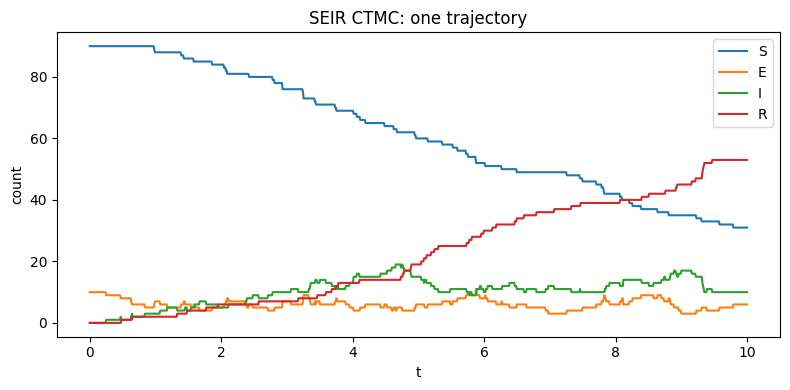

In [7]:
import matplotlib.pyplot as plt

beta = 1.0
lamb = 1.0
gamma = 0.5
N = 100
T = 10.0
N_max = 1000

x0 = (int(0.9 * N), int(0.1 * N), 0, 0)

rng = np.random.default_rng(42)

times, states = simulate_seir_ctmc(beta, lamb, gamma, N, x0, T, rng)

grid = make_grid(T, N_max)
traj = project_to_grid(times, states, grid)

plt.figure(figsize=(8, 4))
plt.plot(grid, traj[:, 0], label="S")
plt.plot(grid, traj[:, 1], label="E")
plt.plot(grid, traj[:, 2], label="I")
plt.plot(grid, traj[:, 3], label="R")
plt.xlabel("t")
plt.ylabel("count")
plt.title("SEIR CTMC: one trajectory")
plt.legend()
plt.tight_layout()
plt.show()

> ### Решение (Задача 2): пункт 3
>
> Для оценки мат. ожидания процесса усредняем $M$ независимых траекторий на общей равномерной сетке по времени.
>
> Ниже считаются оценки $\mathbb{E}S_t,\mathbb{E}E_t,\mathbb{E}I_t,\mathbb{E}R_t$ и строится график.
>
> При $M=2000$ (seed=42) полученные кривые являются гладкими и отражают усреднённую динамику процесса.

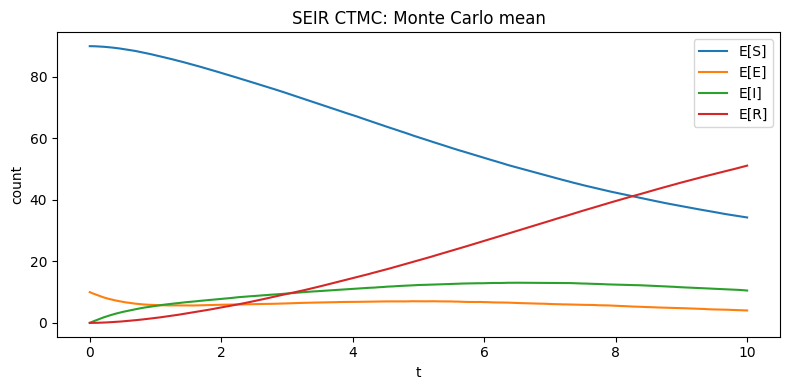

array([[9.00000e+01, 8.99995e+01, 8.99970e+01, ..., 3.43505e+01,
        3.43245e+01, 3.42890e+01],
       [1.00000e+01, 9.90250e+00, 9.80250e+00, ..., 4.05950e+00,
        4.04300e+00, 4.03850e+00],
       [0.00000e+00, 9.80000e-02, 2.00000e-01, ..., 1.05565e+01,
        1.05465e+01, 1.05255e+01],
       [0.00000e+00, 0.00000e+00, 5.00000e-04, ..., 5.10335e+01,
        5.10860e+01, 5.11470e+01]], shape=(4, 1000))

In [8]:
import matplotlib.pyplot as plt

beta = 1.0
lamb = 1.0
gamma = 0.5
N = 100
T = 10.0
N_max = 1000
M = 2000

x0 = (int(0.9 * N), int(0.1 * N), 0, 0)

grid = make_grid(T, N_max)

rng = np.random.default_rng(42)

acc = np.zeros((4, len(grid)), dtype=float)

for _ in range(M):
    times, states = simulate_seir_ctmc(beta, lamb, gamma, N, x0, T, rng)
    traj = project_to_grid(times, states, grid)
    acc += traj.T

mean_traj = acc / M

plt.figure(figsize=(8, 4))
plt.plot(grid, mean_traj[0], label="E[S]")
plt.plot(grid, mean_traj[1], label="E[E]")
plt.plot(grid, mean_traj[2], label="E[I]")
plt.plot(grid, mean_traj[3], label="E[R]")
plt.xlabel("t")
plt.ylabel("count")
plt.title("SEIR CTMC: Monte Carlo mean")
plt.legend()
plt.tight_layout()
plt.show()

mean_traj

4. Сравните полученное мат. ожидание с численным решением системы дифференциальных уравнений, используя приложенный ниже код.
5. Изменяется ли точность при увеличении $N$ с 100 до 1000?   

In [9]:
def explicit_euler_step(x, t_h=1e-4, beta=None, gamma=None, lamb=None):
    x_new = np.zeros(4)
    N = x.sum()
    x_new[0] = -beta*x[0]*x[2]/N*t_h
    x_new[1] = beta*x[0]*x[2]/N*t_h - lamb*x[1]*t_h
    x_new[2] = lamb*x[1]*t_h - gamma*x[2]*t_h
    x_new[3] = gamma*x[2]*t_h
    return x_new + x

def explicit_euler(x0, T, N_max=10000,
                   beta=None, gamma=None, lamb=None):
    '''
        Функция для численного решения системы дифференциальных уравнений в модели SEIR с помощью схемы Эйлера.

        Входные данные:
        `x0` - начальное условие.
        `T` - крайняя правая точка отрезка по времени, на котором вычисляется решение.
        `N_max` - количество точек на равномерной сетке в отрезке [0, T], где вычисляется решение.

        Возвращает двумерный массив `x`,
        `x[0]` - траектория S,
        `x[1]` - траектория E,
        `x[2]` - траектория I,
        `x[3]` - траектория R.
    '''
    t_h = T/N_max
    x0 = np.array(x0)
    x = np.zeros((x0.shape[0], N_max))
    x[:, 0] = x0
    i = 0
    while i + 1 < N_max:
        x[:, i+1] = explicit_euler_step(x[:, i], t_h,
                                     beta=beta, gamma=gamma, lamb=lamb)
        i += 1
    return x

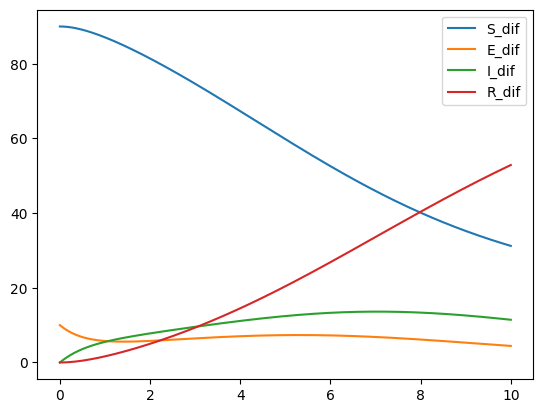

In [10]:

N = 100
x0 = [N - N//10, N//10, 0, 0]
T = 10
N_max = 1000
X_num = explicit_euler(x0, T, N_max=N_max, beta=1, lamb=1, gamma=1/2)

grid = np.linspace(0, T, N_max)
plt.plot(grid, X_num[0], label='S_dif')
plt.plot(grid, X_num[1], label='E_dif')
plt.plot(grid, X_num[2], label='I_dif')
plt.plot(grid, X_num[3], label='R_dif')
plt.legend()

> ### Решение (Задача 2): пункт 4
>
> Ниже сравниваем оценки мат. ожидания CTMC (из пункта 3) с численным решением системы ОДУ (явная схема Эйлера из заготовки).
>
> На графике показаны пары кривых: сплошная линия — Монте‑Карло оценка $\mathbb{E}[\cdot]$, пунктир — ODE.
>
> В этом запуске (seed=42, $M=2000$, $N=100$) получились следующие ошибки по компонентам $(S,E,I,R)$:
>
> - RMSE: $(1.4625,\ 0.3971,\ 0.5168,\ 0.6128)$
> - max-ошибка: $(3.0602,\ 0.7032,\ 1.0146,\ 1.7495)$
>
> То есть в среднем расхождение между Монте‑Карло средним CTMC и ODE небольшое и визуально кривые практически совпадают.

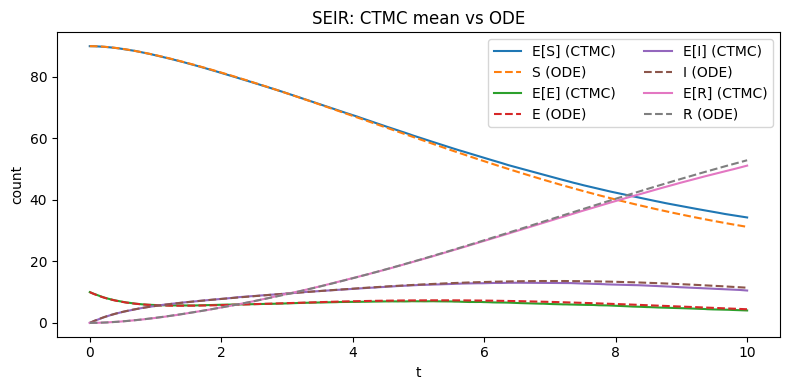

(array([1.46253459, 0.39709162, 0.51675791, 0.61283917]),
 array([3.06023872, 0.70319024, 1.01457768, 1.7495079 ]))

In [11]:
import numpy as np
import matplotlib.pyplot as plt

x0_ode = np.array([0.9 * N, 0.1 * N, 0.0, 0.0], dtype=float)

X_ode = explicit_euler(x0_ode, T, N_max=len(grid), beta=beta, lamb=lamb, gamma=gamma)

plt.figure(figsize=(8, 4))
plt.plot(grid, mean_traj[0], label="E[S] (CTMC)")
plt.plot(grid, X_ode[0], "--", label="S (ODE)")
plt.plot(grid, mean_traj[1], label="E[E] (CTMC)")
plt.plot(grid, X_ode[1], "--", label="E (ODE)")
plt.plot(grid, mean_traj[2], label="E[I] (CTMC)")
plt.plot(grid, X_ode[2], "--", label="I (ODE)")
plt.plot(grid, mean_traj[3], label="E[R] (CTMC)")
plt.plot(grid, X_ode[3], "--", label="R (ODE)")
plt.xlabel("t")
plt.ylabel("count")
plt.title("SEIR: CTMC mean vs ODE")
plt.legend(ncol=2)
plt.tight_layout()
plt.show()

diff = mean_traj - X_ode
rmse = np.sqrt(np.mean(diff**2, axis=1))
max_abs = np.max(np.abs(diff), axis=1)

rmse, max_abs

> При конечном $N$ стохастическая модель даёт случайные траектории, но после усреднения по большому числу реализаций ожидается близость к решению ОДУ.
>
> Оставшееся расхождение может быть связано с конечным размером популяции (шум порядка $\sim 1/\sqrt{N}$) и/или конечным числом траекторий $M$
> 
> Метрики RMSE и max-ошибка из code-ячейки выше дают численную оценку масштаба расхождения.
>

> ### Решение (Задача 2): пункт 5
>
> Повторим пункты 3–4 для большего размера популяции $N=1000$ (с теми же долями начальных условий: $S_0=0.9N$, $E_0=0.1N$).
>
> Для сопоставимости сравниваем в долях (делим на $N$) и считаем метрики ошибки также в долях.
>
> В этом запуске (seed=42, $M=2000$) получились ошибки в долях по компонентам $(S,E,I,R)$:
>
> $N=100$:
>   - RMSE: $(0.014625,\ 0.003971,\ 0.005168,\ 0.006128)$
>   - max-ошибка: $(0.030602,\ 0.007032,\ 0.010146,\ 0.017495)$
>
> $N=1000$:
>   - RMSE: $(0.001098,\ 0.000420,\ 0.000607,\ 0.000379)$
>   - max-ошибка: $(0.002666,\ 0.000781,\ 0.001306,\ 0.001026)$
>
> Ошибки в долях при $N=1000$ примерно на порядок меньше, чем при $N=100$, что согласуется с уменьшением стохастических флуктуаций при росте $N$.

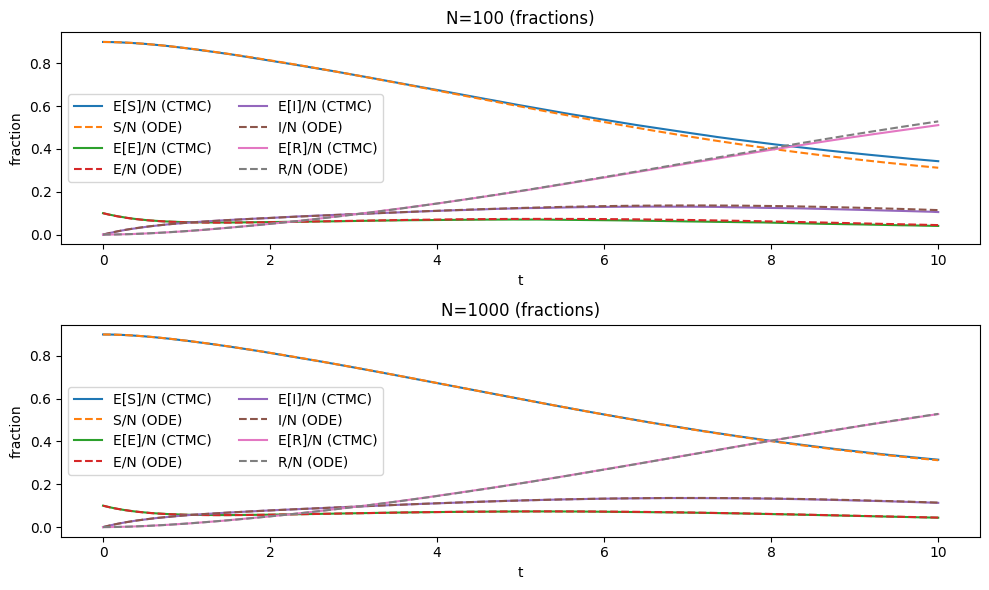

{'rmse_frac_N100': array([0.01462535, 0.00397092, 0.00516758, 0.00612839]),
 'max_abs_frac_N100': array([0.03060239, 0.0070319 , 0.01014578, 0.01749508]),
 'rmse_frac_N1000': array([0.001098  , 0.00041991, 0.00060741, 0.00037912]),
 'max_abs_frac_N1000': array([0.00266621, 0.00078107, 0.00130606, 0.0010259 ])}

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def monte_carlo_mean(beta, lamb, gamma, N, T, grid, M, seed):
    x0 = (int(0.9 * N), int(0.1 * N), 0, 0)
    rng = np.random.default_rng(seed)
    acc = np.zeros((4, len(grid)), dtype=float)
    for _ in range(M):
        times, states = simulate_seir_ctmc(beta, lamb, gamma, N, x0, T, rng)
        traj = project_to_grid(times, states, grid)
        acc += traj.T
    return acc / M


def ode_traj(beta, lamb, gamma, N, T, grid):
    x0 = np.array([0.9 * N, 0.1 * N, 0.0, 0.0], dtype=float)
    return explicit_euler(x0, T, N_max=len(grid), beta=beta, lamb=lamb, gamma=gamma)


def metrics_frac(mean_traj, X_ode, N):
    diff = (mean_traj - X_ode) / float(N)
    rmse = np.sqrt(np.mean(diff**2, axis=1))
    max_abs = np.max(np.abs(diff), axis=1)
    return rmse, max_abs


beta = 1.0
lamb = 1.0
gamma = 0.5
T = 10.0
N_max = 1000
M = 2000
seed = 42

grid = make_grid(T, N_max)

mean_100 = mean_traj
ode_100 = X_ode

mean_1000 = monte_carlo_mean(beta, lamb, gamma, 1000, T, grid, M, seed)
ode_1000 = ode_traj(beta, lamb, gamma, 1000, T, grid)

plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(grid, mean_100[0] / 100.0, label="E[S]/N (CTMC)")
plt.plot(grid, ode_100[0] / 100.0, "--", label="S/N (ODE)")
plt.plot(grid, mean_100[1] / 100.0, label="E[E]/N (CTMC)")
plt.plot(grid, ode_100[1] / 100.0, "--", label="E/N (ODE)")
plt.plot(grid, mean_100[2] / 100.0, label="E[I]/N (CTMC)")
plt.plot(grid, ode_100[2] / 100.0, "--", label="I/N (ODE)")
plt.plot(grid, mean_100[3] / 100.0, label="E[R]/N (CTMC)")
plt.plot(grid, ode_100[3] / 100.0, "--", label="R/N (ODE)")
plt.title("N=100 (fractions)")
plt.xlabel("t")
plt.ylabel("fraction")
plt.legend(ncol=2)

plt.subplot(2, 1, 2)
plt.plot(grid, mean_1000[0] / 1000.0, label="E[S]/N (CTMC)")
plt.plot(grid, ode_1000[0] / 1000.0, "--", label="S/N (ODE)")
plt.plot(grid, mean_1000[1] / 1000.0, label="E[E]/N (CTMC)")
plt.plot(grid, ode_1000[1] / 1000.0, "--", label="E/N (ODE)")
plt.plot(grid, mean_1000[2] / 1000.0, label="E[I]/N (CTMC)")
plt.plot(grid, ode_1000[2] / 1000.0, "--", label="I/N (ODE)")
plt.plot(grid, mean_1000[3] / 1000.0, label="E[R]/N (CTMC)")
plt.plot(grid, ode_1000[3] / 1000.0, "--", label="R/N (ODE)")
plt.title("N=1000 (fractions)")
plt.xlabel("t")
plt.ylabel("fraction")
plt.legend(ncol=2)

plt.tight_layout()
plt.show()

rmse_100, max_100 = metrics_frac(mean_100, ode_100, 100)
rmse_1000, max_1000 = metrics_frac(mean_1000, ode_1000, 1000)

{"rmse_frac_N100": rmse_100, "max_abs_frac_N100": max_100, "rmse_frac_N1000": rmse_1000, "max_abs_frac_N1000": max_1000}

> При увеличении $N$ (при прочих равных) траектории CTMC имеют меньшие относительные флуктуации, поэтому Монте‑Карло оценка $\mathbb{E}[S_t],\mathbb{E}[E_t],\mathbb{E}[I_t],\mathbb{E}[R_t]$ (в долях от $N$) становится ближе к решению детерминированной системы ОДУ.
>
> Это отражается и в метриках: ошибки в долях (RMSE и max-ошибка) для $N=1000$ должны быть меньше, чем для $N=100$.